In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch import Tensor
import matplotlib.pyplot as plt


# Show all available GPUs
print(torch.cuda.get_device_name(0))

# Set device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

print('=======================\n')
GPU = False
# Set default tensor type to cuda.FloatTensor if GPU is available
if torch.cuda.is_available() and GPU:
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    torch.set_default_device(device)
    torch.set_default_dtype(torch.float32)
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    print(f"Dtype: {torch.get_default_dtype()}")
    print(f"Device: {torch.cuda.current_device()}")
else:
    torch.set_default_tensor_type(torch.FloatTensor)
    device = torch.device("cpu")
    torch.set_default_device(device)
    print("Using CPU")


# Set seed for reproducibility
torch.manual_seed(0)

NVIDIA GeForce RTX 2060
cuda:0

Using CPU


/home/poryadok/miniconda3/lib/python3.11/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /opt/conda/conda-bld/pytorch_1699449201450/work/torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


In [5]:
import random
import importlib


# Local imports modules
import classes.SimulationNN as SimulationNN
import classes.Systems as Systems
import classes.PID as PID

# Reload modules
importlib.reload(SimulationNN)
importlib.reload(Systems)
importlib.reload(PID)

# Local import reloaded classes
from classes.SimulationNN import Simulation
from classes.Systems import Trolley
from classes.PID import PID

# Trolley simulation

In [15]:
dt = torch.tensor(0.01)
time = torch.arange(0, 200, dt)
target = torch.ones_like(time) * 10
disturbance = torch.zeros_like(time)

# Change target
target[time > 50] = 20
target[time > 100] = 0
target[time > 150] = 10

# Create a PID controller
KP = torch.tensor(0.8)
KI = torch.tensor(0.1)
KD = torch.tensor(0.5)
pid = PID(KP=KP, KI=KI, KD=KD)

# Create a system
mass = torch.tensor(2)
friction = torch.tensor(0.2)
system = Trolley(mass=mass, friction=friction, dt=dt)

# Create a simulation environment
sim = Simulation(time, target, disturbance, dt)

/home/poryadok/miniconda3/lib/python3.11/site-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Run the simulation

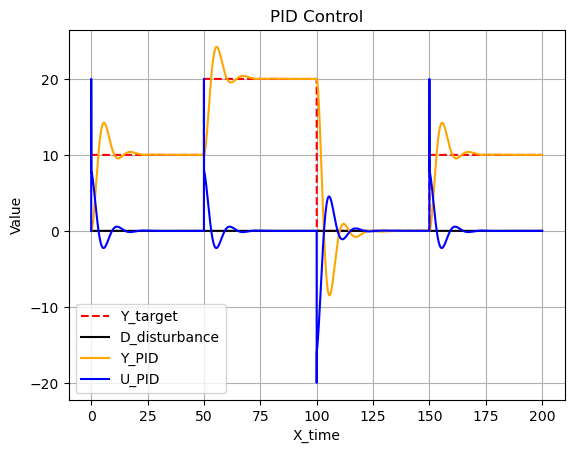

In [16]:
# Run the simulation
sim.run(system, pid)
sim.plot()